In [112]:
# DELIVERABLE FOR THE PROJECT:
# "KINEMATICS OF MOBILITY"
# David Pastor-Escuredo (Life D Lab)
# Licencia MIT

In [113]:
#Copyright <2019> <David Pastor Escuredo>

#Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

#The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

#THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [114]:
import pandas as pd
import numpy as np
import json
from nltk.tokenize import word_tokenize
import re
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import collections
from sklearn.cluster import KMeans
from PIL import Image
import time
from datetime import datetime, timedelta, date
from os import listdir
from os.path import isfile, join
from geopandas import GeoDataFrame
from shapely.geometry import Point
import pickle

%matplotlib inline

def getday(d):
    if d<10:
        ds='0'+str(d)
    else:
        ds=str(d)
    return ds

In [84]:
ant_file='/Volumes/OS Disk/Tef_Colombia/datos/CONSULTA_SECTORES.xls'
ant_file='antennas/CONSULTA_SECTORES_2.xls'
ant_file='antennas/antennas.csv'
#xls=pd.ExcelFile(ant_file)#,decimal=',')
#sheet=xls.parse(0)
sheet=pd.read_csv(ant_file,delimiter=';')
print(sheet.head())
LAC=sheet['LAC_HEX']
Cell=sheet['Celda_HEX']
lon=sheet['LONGITUD']
lat=sheet['LATITUD']
sheet['antenna_id']=LAC+Cell
#print(sheet['antenna_id'])
aid=sheet['antenna_id']
print(len(sheet))
print(sheet.head())

   LATITUD  LONGITUD Celda_HEX LAC_HEX
0   4.6092  -74.0718      2711    083F
1   4.6092  -74.0718      2712    083F
2   4.6092  -74.0718      2713    083F
3   4.6092  -74.0718      2714    083F
4   4.6092  -74.0718      2715    083F
29869
   LATITUD  LONGITUD Celda_HEX LAC_HEX antenna_id
0   4.6092  -74.0718      2711    083F   083F2711
1   4.6092  -74.0718      2712    083F   083F2712
2   4.6092  -74.0718      2713    083F   083F2713
3   4.6092  -74.0718      2714    083F   083F2714
4   4.6092  -74.0718      2715    083F   083F2715


32
32


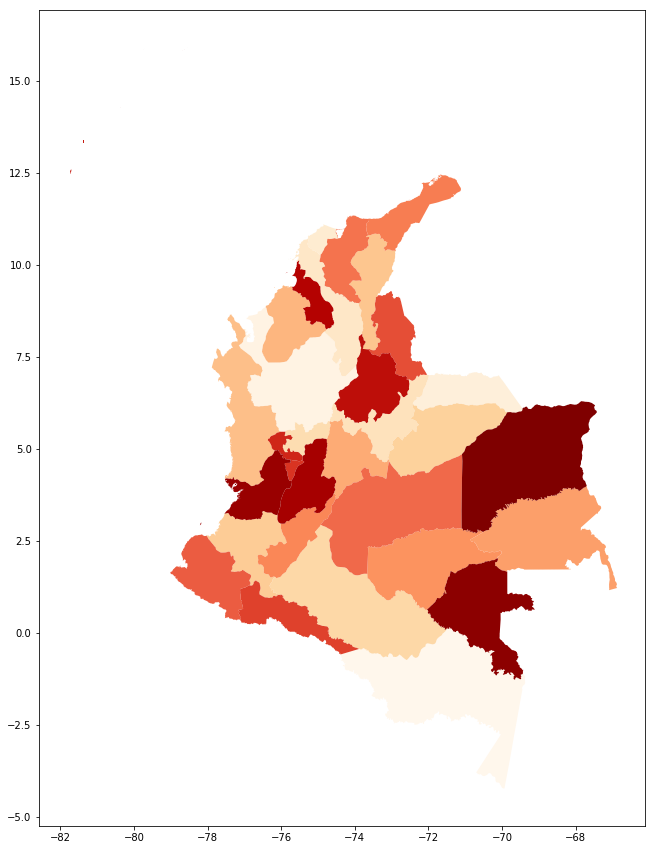

In [117]:
#Plot regions level 1
shapefile='gadm36_COL_shp/gadm36_COL_1.shp'
mshape = gpd.read_file(shapefile)
print(len(mshape))
c=[]
for i in range(0,len(mshape)):
    c.append(i)
print(len(c))

#c[13]=c[12]
#c[12]=c[0]
mshape['value']=c
ax1=mshape.plot(column=mshape['value'],cmap='OrRd',alpha=1,figsize=[15,15])



In [118]:
#List regions level 1
n1=mshape['NAME_1']
n1s=set(n1)
print(n1s)

{'GuainÃ\xada', 'Sucre', 'Norte de Santander', 'Guaviare', 'NariÃ±o', 'Valle del Cauca', 'QuindÃ\xado', 'CÃ³rdoba', 'Antioquia', 'Amazonas', 'Caldas', 'Vichada', 'Huila', 'Cesar', 'Santander', 'Casanare', 'San AndrÃ©s y Providencia', 'Risaralda', 'Meta', 'Cundinamarca', 'Cauca', 'La Guajira', 'Magdalena', 'Arauca', 'ChocÃ³', 'AtlÃ¡ntico', 'BolÃ\xadvar', 'Putumayo', 'BoyacÃ¡', 'VaupÃ©s', 'Tolima', 'CaquetÃ¡'}


1065
1065


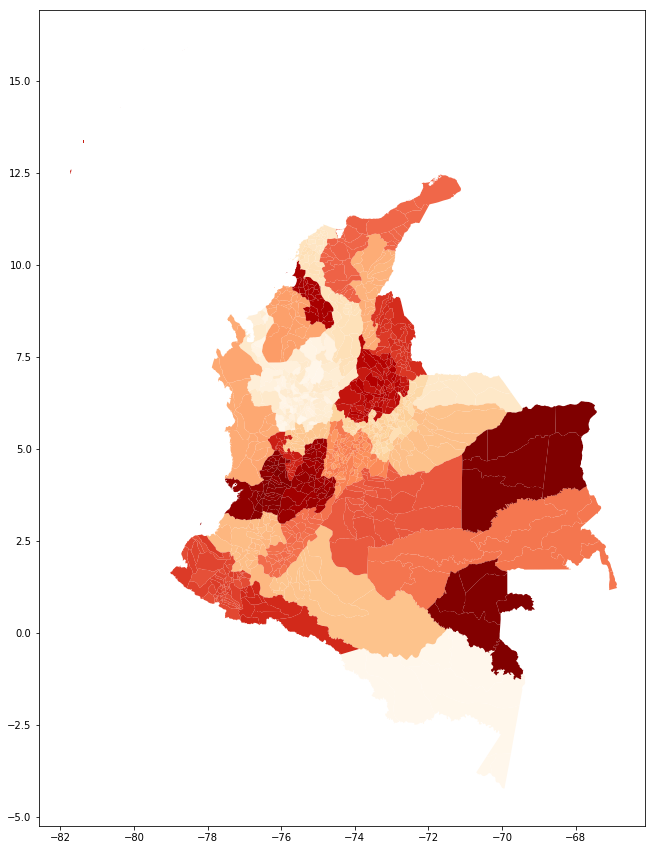

In [115]:
#Plot regions level2
shapefile='gadm36_COL_shp/gadm36_COL_2.shp'
mshape = gpd.read_file(shapefile)
print(len(mshape))
c=[]
for i in range(0,len(mshape)):
    c.append(i)
print(len(c))

#c[13]=c[12]
#c[12]=c[0]
mshape['value']=c
ax1=mshape.plot(column=mshape['value'],cmap='OrRd',alpha=1,figsize=[15,15])


In [116]:
#List regions level 2 for one region level 1
shapefile='gadm36_COL_shp/gadm36_COL_2.shp'
mshape = gpd.read_file(shapefile)
nam='Cundinamarca'
n2l=[]
for i in range(0,len(mshape)):
    mreg=mshape['NAME_1'].iloc[i]
    if mreg==nam:
        n2l.append(mshape['NAME_2'].iloc[i])
n2s=set(n2l)
print(n2s)

{'Quetame', 'Bituima', 'Puerto Salgar', 'JunÃ\xadn', 'San Bernardo', 'SesquilÃ©', 'San Cayetano', 'Carmen de Carupa', 'VillagÃ³mez', 'FacatativÃ¡', 'Silvania', 'El Colegio', 'YacopÃ\xad', 'Cachipay', 'Sutatausa', 'GuataquÃ\xad', 'PulÃ\xad', 'SopÃ³', 'Tibirita', 'ZipacÃ³n', 'Agua de Dios', 'VianÃ\xad', 'Guaduas', 'Tausa', 'BojacÃ¡', 'San Francisco', 'Anolaima', 'CaparrapÃ\xad', 'La Palma', 'FusagasugÃ¡', 'GachetÃ¡', 'Suesca', 'Cota', 'SibatÃ©', 'Nocaima', 'Tocaima', 'NemocÃ³n', 'BeltrÃ¡n', 'Fosca', 'San Antonio del Tequendama', 'Guayabetal', 'SupatÃ¡', 'ZipaquirÃ¡', 'Gama', 'CÃ¡queza', 'Cogua', 'CajicÃ¡', 'ChÃ\xada', 'Manta', 'Tibacuy', 'NariÃ±o', 'Pasca', 'Utica', 'GachancipÃ¡', 'Tabio', 'Simijaca', 'Venecia', 'ViotÃ¡', 'Tena', 'GutiÃ©rrez', 'SantafÃ© de BogotÃ¡', 'Villeta', 'Guayabal de SÃ\xadquima', 'San Juan de RÃ\xado Seco', 'Tenjo', 'Lenguazaque', 'Mosquera', 'JerusalÃ©n', 'FÃºquene', 'La Vega', 'ChaguanÃ\xad', 'Apulo', 'Funza', 'Guasca', 'MachetÃ¡', 'Subachoque', 'Ricaurte', 'Pai

In [85]:
-


   index  LATITUD  LONGITUD Celda_HEX LAC_HEX antenna_id
0      0   4.6092  -74.0718      2711    083F   083F2711
1      1   4.6092  -74.0718      2712    083F   083F2712
2      2   4.6092  -74.0718      2713    083F   083F2713
3      3   4.6092  -74.0718      2714    083F   083F2714
4      4   4.6092  -74.0718      2715    083F   083F2715
{'GuainÃ\xada', 'Sucre', 'Norte de Santander', 'Guaviare', 'NariÃ±o', 'Valle del Cauca', 'QuindÃ\xado', 'CÃ³rdoba', 'Antioquia', 'Amazonas', 'Caldas', 'Vichada', 'Huila', 'Cesar', 'Santander', 'Casanare', 'San AndrÃ©s y Providencia', 'Risaralda', 'Meta', 'Cundinamarca', 'Cauca', 'La Guajira', 'Magdalena', 'Arauca', 'ChocÃ³', 'AtlÃ¡ntico', 'BolÃ\xadvar', 'Putumayo', 'BoyacÃ¡', 'VaupÃ©s', 'Tolima', 'CaquetÃ¡'}
1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


TypeError: write() argument must be str, not bytes

In [111]:
#Write antennas for on given department
with open('antennas/regions.rff', 'rb') as f:
    regions=pickle.load(f)
print(regions.keys())
nam='Cundinamarca'
#nam='Arauca'
ant_file='antennas/antennas_colombia.csv'
sheet=pd.read_csv(ant_file,delimiter=',')
print(sheet.head())
print(len(sheet))
aid_list=regions[nam]['antennas']
print(len(aid_list))
df=[]
for a in range(0,len(aid_list)):
    aid=sheet[sheet['antenna_id']==aid_list[a]]
    df.append(aid)
    
df2=pd.concat(df,ignore_index=True)
df3=df2.drop(['index'],axis=1)
print(df3.head())
df3.to_csv('antennas/antennas_'+nam+'.csv')


dict_keys(['GuainÃ\xada', 'Sucre', 'Norte de Santander', 'Guaviare', 'NariÃ±o', 'Valle del Cauca', 'QuindÃ\xado', 'CÃ³rdoba', 'Antioquia', 'Amazonas', 'Caldas', 'Vichada', 'Huila', 'Cesar', 'Santander', 'Casanare', 'San AndrÃ©s y Providencia', 'Risaralda', 'Meta', 'Cundinamarca', 'Cauca', 'La Guajira', 'Magdalena', 'Arauca', 'ChocÃ³', 'AtlÃ¡ntico', 'BolÃ\xadvar', 'Putumayo', 'BoyacÃ¡', 'VaupÃ©s', 'Tolima', 'CaquetÃ¡'])
   index  LATITUD  LONGITUD Celda_HEX LAC_HEX antenna_id
0      0   4.6092  -74.0718      2711    083F   083F2711
1      1   4.6092  -74.0718      2712    083F   083F2712
2      2   4.6092  -74.0718      2713    083F   083F2713
3      3   4.6092  -74.0718      2714    083F   083F2714
4      4   4.6092  -74.0718      2715    083F   083F2715
29865
8224
   LATITUD  LONGITUD Celda_HEX LAC_HEX antenna_id
0   4.6092  -74.0718      2711    083F   083F2711
1   4.6092  -74.0718      2712    083F   083F2712
2   4.6092  -74.0718      2713    083F   083F2713
3   4.6092  -74.0718    

In [24]:
shapefile='antennas/antennas_colombia.shp'
mshape = gpd.read_file(shapefile)
print(len(mshape))

ant_file='antennas/antennas.csv'
#xls=pd.ExcelFile(ant_file)#,decimal=',')
#sheet=xls.parse(0)
sheet=pd.read_csv(ant_file,delimiter=';')
print(len(sheet))

ant_file='antennas/antennas_colombia.csv'
#xls=pd.ExcelFile(ant_file)#,decimal=',')
#sheet=xls.parse(0)
sheet=pd.read_csv(ant_file,delimiter=',')
print(len(sheet))

29865
29869
29865


1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


29865
  antenna_id                 geometry
0   083F2711  POINT (-74.0718 4.6092)
1   083F2712  POINT (-74.0718 4.6092)
2   083F2713  POINT (-74.0718 4.6092)
3   083F2714  POINT (-74.0718 4.6092)
4   083F2715  POINT (-74.0718 4.6092)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


29865


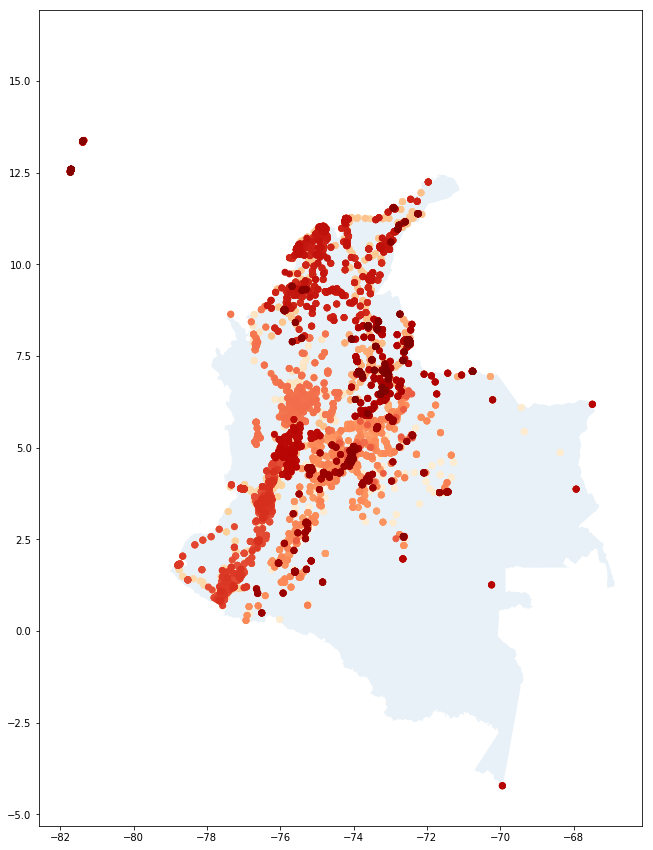

In [23]:
#Filter antennas inside Colombia
shapefile='gadm36_COL_shp/gadm36_COL_0.shp'
mshape = gpd.read_file(shapefile)
print(len(mshape))
ax1=mshape.plot(alpha=0.1,figsize=[15,15])

sheet2=sheet[sheet['LONGITUD']<0]
sheet3=sheet2[sheet2['LATITUD']>-50]

LAC=sheet3['LAC_HEX']
Cell=sheet3['Celda_HEX']
lon=sheet3['LONGITUD']
lat=sheet3['LATITUD']
sheet3['antenna_id']=LAC+Cell
#print(sheet['antenna_id'])
aid=sheet3['antenna_id']

#write antennas filtered
sheet3.to_csv('antennas_colombia.csv')

print(len(aid))
#convert to geopanda
geometry = [Point(xy) for xy in zip(lon, lat)]
#print(geometry)
df=aid
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(df, crs=crs, geometry=geometry)
print(gdf.head())

gdf.to_file('antennas_colombia.shp')

gdf2=gdf

#gdf.plot()
c=[]
for i in range(0,len(gdf2)):
    c.append(i)
print(len(c))
gdf2['value']=c
gdf2.plot(ax=ax1,column=gdf2['value'],cmap='OrRd')

In [7]:
#Limits
#lat=pd.to_numeric(lat)
#lon=pd.to_numeric(lon)
minlat=np.float64(np.min(lat))
maxlat=np.float64(np.max(lat))
minlon=np.float64(np.min(lon))
maxlon=np.float64(np.max(lon))
print(minlat,maxlat,minlon,maxlon)

minlon=-83
minlat=0

sheet2=sheet[sheet['LONGITUD']<0]
sheet3=sheet2[sheet2['LATITUD']>-50]

print(len(sheet))
print(len(sheet2))
print(len(sheet3))

LAC=sheet3['LAC_HEX']
Cell=sheet3['Celda_HEX']
lon=sheet3['LONGITUD']
lat=sheet3['LATITUD']
aid=sheet3['antenna_id']

minlat=np.float64(np.min(lat))
maxlat=np.float64(np.max(lat))
minlon=np.float64(np.min(lon))
maxlon=np.float64(np.max(lon))
print(minlat,maxlat,minlon,maxlon)

-76.5484 13.3764 -81.7294 74.0386
29869
29868
29865
-4.22136 13.3764 -81.7294 -67.4877
